In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [3]:
# importing data frame
path = r'C:\Users\ali\OneDrive\Desktop\careerfoundry\Data Immersion\Achievement 4\15-08-2025 Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'prepared Data', 'orders_products_merged_grouped.pkl'))

#### Bar Chart

<Axes: xlabel='orders_day_of_week'>

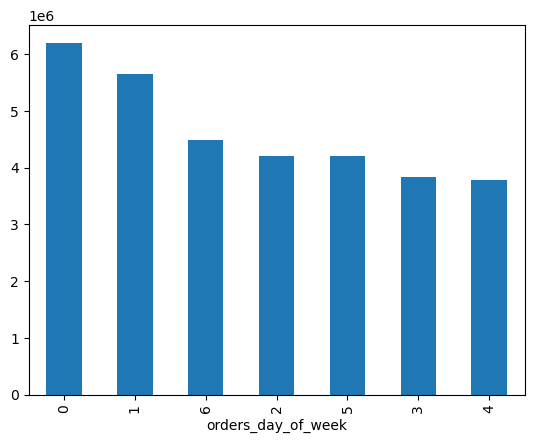

In [4]:
# creating bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

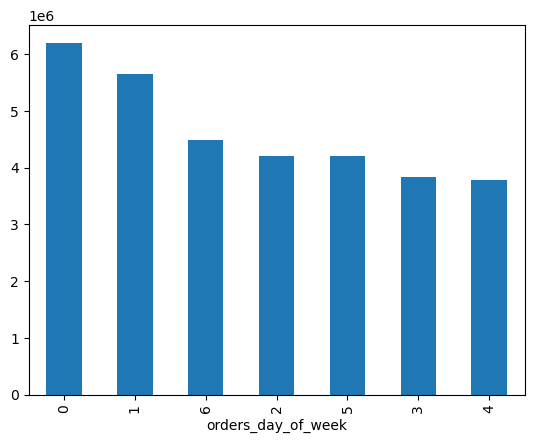

In [5]:
# saving bar chart
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

In [6]:
# saving bar chart as image file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#### Histogram

<Axes: ylabel='Frequency'>

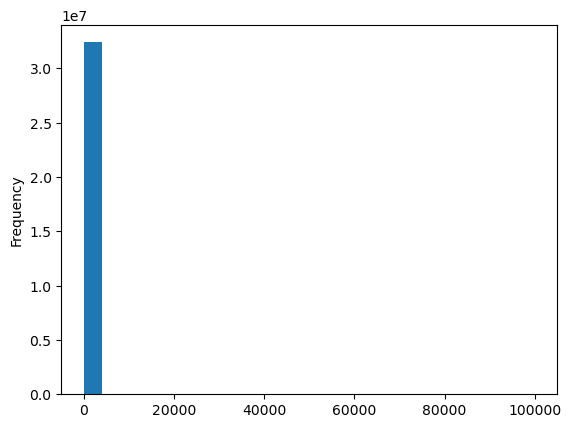

In [31]:
# creating a histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

#### Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

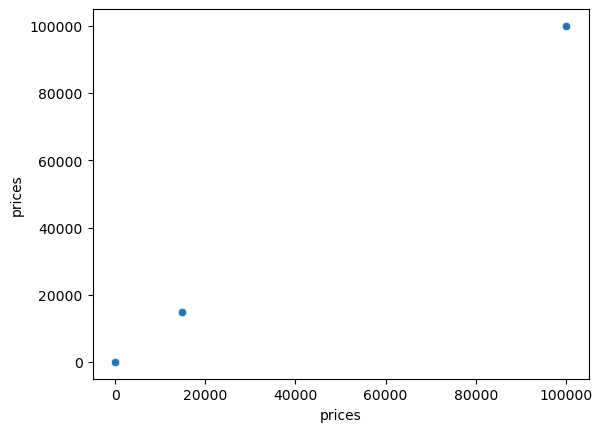

In [32]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)


In [33]:
pd.options.display.max_columns = None

In [34]:
# checking for odd values in prices column
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,Average_price,spending_flag,order_frequency_days,Order_frequency_flag,median_days_between_orders
1576,912404,17,12,2,14,5.0,0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer,5.0
1638,603376,17,22,6,16,4.0,0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer,5.0
16534,3264360,135,2,2,21,13.0,0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer,12.0
16540,892534,135,3,0,8,12.0,0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Busiest days,Fewest orders,4,New customer,1154.792308,High spender,12.0,Regular customer,12.0
53711,229704,342,8,1,19,30.0,0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32350064,3172853,205650,18,1,9,7.0,0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Busiest days,Most orders,25,Regular customer,351.141618,High spender,6.0,Frequent customer,6.0
32377297,2504315,205818,3,5,15,3.0,0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Most orders,25,Regular customer,170.073770,High spender,13.0,Regular customer,13.0
32377307,1108388,205818,5,4,5,1.0,0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,slowest days,Fewest orders,25,Regular customer,170.073770,High spender,13.0,Regular customer,13.0
32410137,1916142,206049,1,2,17,NaN,1,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Average orders,5,New customer,938.031250,High spender,7.0,Frequent customer,7.0


In [35]:
# replacing odd values with NaN for now
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [36]:
ords_prods_merge['prices'].max()

25.0

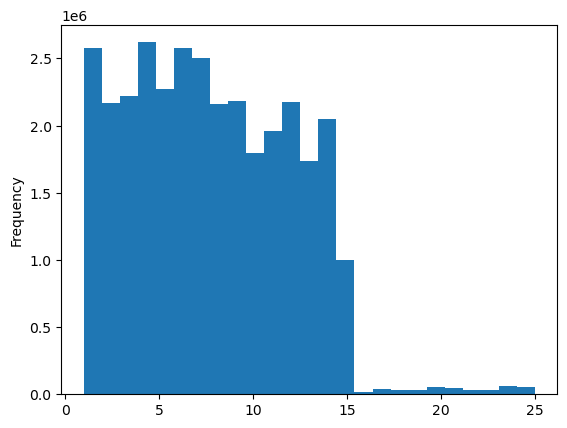

In [7]:
# creating histogram with updated dataframe
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

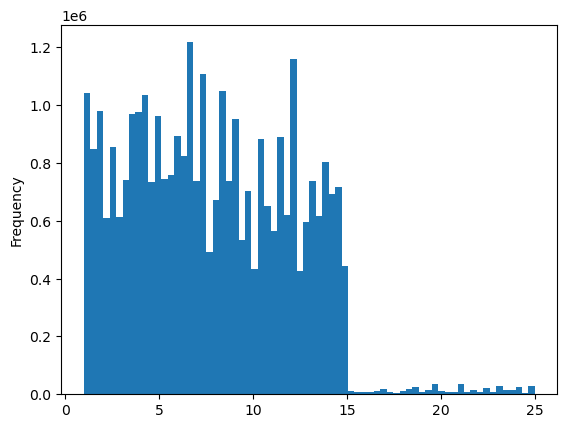

In [8]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [9]:
# Exporting histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))

#### Line Charts

In [10]:
# creating a 70/30 sample
np.random.seed(4)
#creating a list dev holding true/false values to the test np.random.rand() <=0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [11]:
# store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [12]:
# store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [13]:
len(ords_prods_merge)

32404289

In [14]:
len(big) + len(small)

32404289

In [15]:
# creating a dataframe that only includes required columns for the line chart
df_2 = small[['orders_day_of_week','prices']]

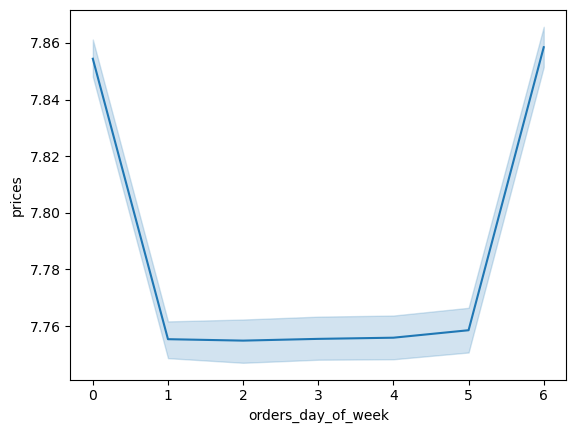

In [16]:
# creating line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [18]:
# saving line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))